In [1]:
import numpy as np
import pandas as pd
housingdata = pd.read_csv("SD1970_housing.csv")
housingpop = pd.read_csv("SD1970_population.csv")

In [2]:
mergedhousing = housingpop.merge(housingdata, left_index=True, right_index=True)
mergedhousing.head()

,Census Tract Name,Block Group,Place Name_x,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,Renter occupied housing units with 1.01 or more persons per room,Total Black occupied housing units with 1.01 or more persons per room,Black owner occupied housing units with 1.01 or more persons per room,Black renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,10,...,...,...,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,11,...,...,...,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,13,...,...,...,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,9,...,...,...,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,0,...,...,...,486,3,9,0,142,1


In [3]:
mergedhousing.to_csv("mergeddata.csv", encoding='utf-8', index=False)

In [4]:
# combining population data, ages: 0-10, 11-19, 20-24, part of 2.4
clean = pd.read_csv("cleanData.csv")
male_age = clean.loc[:,"Male persons age under 5 years":"Male persons age 75 and over"]
male_age

,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,Male persons age 15 years,Male persons age 16 years,Male persons age 17 years,Male persons age 18 years,...,Male persons age 21 years,Male persons age 22-24 years,Male persons age 25-34 years,Male persons age 35-44 years,Male persons age 45-54 years,Male persons age 55-59 years,Male persons age 60-61 years,Male persons age 62-64 years,Male persons age 65-74 years,Male persons age 75 and over
0,31,6,9,29,32,9,15,6,11,8,...,4,13,42,45,50,20,6,14,30,20
1,28,2,9,14,21,6,3,9,4,12,...,5,8,27,32,32,21,3,18,19,16
2,18,4,4,15,26,6,7,7,4,3,...,6,2,19,28,38,13,9,5,17,14
3,9,3,5,5,7,3,4,1,7,5,...,4,5,21,12,35,14,7,12,25,9
4,12,2,4,6,13,4,3,4,2,2,...,6,6,19,32,32,17,7,8,18,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,5,1,0,9,16,2,1,1,3,1,...,1,2,6,16,12,11,4,9,18,6
1260,4,5,2,9,6,4,0,6,3,2,...,3,5,14,13,21,8,2,3,9,4
1261,14,2,3,21,19,3,5,4,5,2,...,2,3,18,40,31,16,3,4,23,12
1262,12,1,4,8,17,6,7,8,6,1,...,1,5,22,18,42,17,9,14,37,27


In [5]:
male_age = male_age.replace('...', np.nan)
male_age = male_age.dropna()
male_age = male_age.astype(str).astype(int)

In [6]:
male_age["Male persons age 0-9 years"] = male_age["Male persons age under 5 years"] + male_age["Male persons age 5 years"] + male_age["Male persons age 6 years"] + male_age["Male persons age 7-9 years"]
male_age["Male persons age 0-9 years"]

0       75
1       53
2       41
3       22
4       24
        ..
1259    15
1260    20
1261    40
1262    25
1263     0
Name: Male persons age 0-9 years, Length: 1174, dtype: int32

In [7]:
male_age["Male persons age 10-19 years"] = male_age["Male persons age 10-13 years"] + male_age["Male persons age 14 years"] + male_age["Male persons age 15 years"] + male_age["Male persons age 16 years"] + male_age["Male persons age 17 years"] + male_age["Male persons age 18 years"] + male_age["Male persons age 19 years"]
male_age["Male persons age 10-19 years"]

0       83
1       61
2       55
3       29
4       28
        ..
1259    27
1260    23
1261    41
1262    50
1263     0
Name: Male persons age 10-19 years, Length: 1174, dtype: int32

In [8]:
age_20 = male_age["Male persons age 20 years"] + male_age["Male persons age 21 years"] + male_age["Male persons age 22-24 years"]
age_20

0       20
1       18
2       10
3       11
4       15
        ..
1259     4
1260    10
1261     5
1262     9
1263     0
Length: 1174, dtype: int32

In [9]:
male_age["Male persons age 20-24 years"] = age_20
male_age

,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,Male persons age 15 years,Male persons age 16 years,Male persons age 17 years,Male persons age 18 years,...,Male persons age 35-44 years,Male persons age 45-54 years,Male persons age 55-59 years,Male persons age 60-61 years,Male persons age 62-64 years,Male persons age 65-74 years,Male persons age 75 and over,Male persons age 0-9 years,Male persons age 10-19 years,Male persons age 20-24 years
0,31,6,9,29,32,9,15,6,11,8,...,45,50,20,6,14,30,20,75,83,20
1,28,2,9,14,21,6,3,9,4,12,...,32,32,21,3,18,19,16,53,61,18
2,18,4,4,15,26,6,7,7,4,3,...,28,38,13,9,5,17,14,41,55,10
3,9,3,5,5,7,3,4,1,7,5,...,12,35,14,7,12,25,9,22,29,11
4,12,2,4,6,13,4,3,4,2,2,...,32,32,17,7,8,18,12,24,28,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,5,1,0,9,16,2,1,1,3,1,...,16,12,11,4,9,18,6,15,27,4
1260,4,5,2,9,6,4,0,6,3,2,...,13,21,8,2,3,9,4,20,23,10
1261,14,2,3,21,19,3,5,4,5,2,...,40,31,16,3,4,23,12,40,41,5
1262,12,1,4,8,17,6,7,8,6,1,...,18,42,17,9,14,37,27,25,50,9


In [10]:
male_age = male_age.drop(["Male persons age under 5 years", "Male persons age 5 years", "Male persons age 6 years", "Male persons age 7-9 years", "Male persons age 10-13 years", "Male persons age 14 years", "Male persons age 15 years", "Male persons age 16 years", "Male persons age 17 years", "Male persons age 18 years", "Male persons age 19 years", "Male persons age 20 years", "Male persons age 21 years", "Male persons age 22-24 years"], axis=1)
male_age

,Male persons age 25-34 years,Male persons age 35-44 years,Male persons age 45-54 years,Male persons age 55-59 years,Male persons age 60-61 years,Male persons age 62-64 years,Male persons age 65-74 years,Male persons age 75 and over,Male persons age 0-9 years,Male persons age 10-19 years,Male persons age 20-24 years
0,42,45,50,20,6,14,30,20,75,83,20
1,27,32,32,21,3,18,19,16,53,61,18
2,19,28,38,13,9,5,17,14,41,55,10
3,21,12,35,14,7,12,25,9,22,29,11
4,19,32,32,17,7,8,18,12,24,28,15
...,...,...,...,...,...,...,...,...,...,...,...
1259,6,16,12,11,4,9,18,6,15,27,4
1260,14,13,21,8,2,3,9,4,20,23,10
1261,18,40,31,16,3,4,23,12,40,41,5
1262,22,18,42,17,9,14,37,27,25,50,9


In [11]:
cols = male_age.columns.tolist()
cols

['Male persons age 25-34 years',
 'Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years',
 'Male persons age 65-74 years',
 'Male persons age 75 and over',
 'Male persons age 0-9 years',
 'Male persons age 10-19 years',
 'Male persons age 20-24 years']

In [12]:
cols = cols[-3:] + cols[:-3]
cols

['Male persons age 0-9 years',
 'Male persons age 10-19 years',
 'Male persons age 20-24 years',
 'Male persons age 25-34 years',
 'Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years',
 'Male persons age 65-74 years',
 'Male persons age 75 and over']

In [13]:
male_age = male_age[cols]
male_age

,Male persons age 0-9 years,Male persons age 10-19 years,Male persons age 20-24 years,Male persons age 25-34 years,Male persons age 35-44 years,Male persons age 45-54 years,Male persons age 55-59 years,Male persons age 60-61 years,Male persons age 62-64 years,Male persons age 65-74 years,Male persons age 75 and over
0,75,83,20,42,45,50,20,6,14,30,20
1,53,61,18,27,32,32,21,3,18,19,16
2,41,55,10,19,28,38,13,9,5,17,14
3,22,29,11,21,12,35,14,7,12,25,9
4,24,28,15,19,32,32,17,7,8,18,12
...,...,...,...,...,...,...,...,...,...,...,...
1259,15,27,4,6,16,12,11,4,9,18,6
1260,20,23,10,14,13,21,8,2,3,9,4
1261,40,41,5,18,40,31,16,3,4,23,12
1262,25,50,9,22,18,42,17,9,14,37,27


In [14]:
male_sums = male_age.sum()
print(male_sums)

Male persons age 0-9 years      104271
Male persons age 10-19 years    105534
Male persons age 20-24 years     51236
Male persons age 25-34 years     71061
Male persons age 35-44 years     63221
Male persons age 45-54 years     62532
Male persons age 55-59 years     23086
Male persons age 60-61 years      8052
Male persons age 62-64 years     10328
Male persons age 65-74 years     25884
Male persons age 75 and over     14586
dtype: int64


In [15]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Male population by age group')

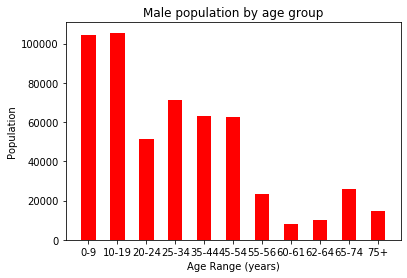

In [16]:
plt.bar(['0-9','10-19','20-24','25-34','35-44','45-54','55-56','60-61','62-64','65-74','75+'], male_sums, 0.5, color='red')
plt.xlabel('Age Range (years)')
plt.ylabel('Population')
plt.title('Male population by age group')